# Geoloalización

In [ ]:
import plotly.figure_factory as ff
import plotly.tools as tl
import pandas as pd
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.graph_objects as go




In [2]:
from chart_studio import plotly

In [3]:
import plotly.offline as pyoff
import plotly.graph_objs as go

In [ ]:
!pip install geopandas

In [5]:
import geopandas as gpd

## Ubicaciones geográficas centros de consumo

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/M4_Python_David/datos_transporte_2.csv", index_col=0)

In [8]:
df.head()

,Cliente,Estado,Poblacion,N_Cliente,Cajas,Ruta,Costo_caja,Longitud,Latitud
Origen,,,,,,,,,
Cuatitlán,McD PEDREGAL (CDMX),Ciudad de México,Alvaro Obregón,300000,424,253,3.481940,-99.211035,19.306881
Cuatitlán,McD MARIANO OTERO (Gdl. Jal),Jalisco,Guadalajara,300004,335,527,15.849010,-103.398752,20.650664
Cuatitlán,McD ZONA ROSA (CDMX),Ciudad de México,Cuauhtémoc,300006,264,466,3.969412,-99.163782,19.426098
Cuatitlán,McD PARQUE HUNDIDO (CDMX),Ciudad de México,Benito Juárez,300007,601,563,3.988180,-99.176940,19.379423
Cuatitlán,McD INTERLOMAS (EM),Estado de México,Huixquilucan,300008,374,270,3.015192,-99.269409,19.400598


In [11]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df2 = df[["Longitud", "Latitud"]]
X = df2[["Longitud"]].to_numpy()
y = df2[["Latitud"]].to_numpy()
df2

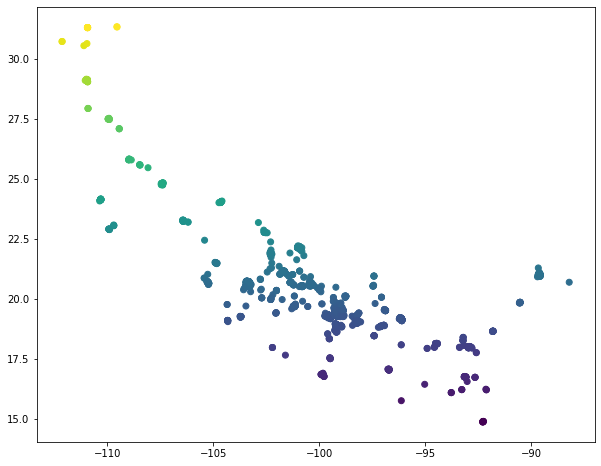

In [21]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], y[:, 0], c=y);

In [14]:
K = 4

In [15]:
kmeans = KMeans(n_clusters=K, init="random", n_init=10, max_iter=300, algorithm="elkan")

In [16]:
kmeans.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=4)

In [17]:
centers = kmeans.cluster_centers_

In [22]:
y_pred = kmeans.predict(X)

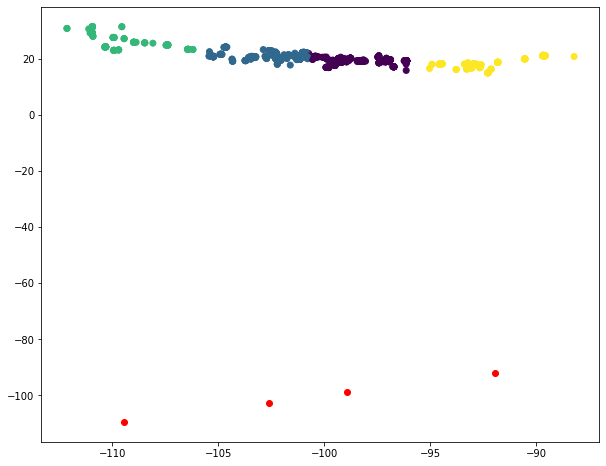

In [57]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], y[:, 0], c=y_pred)
plt.scatter(centers[:, 0], centers[:, 0], c='r');

In [41]:
df['Cajas'] = (df['Cajas']).astype(int)
df['etiqueta'] = df['Estado '].astype(str) + ' ' + df['Poblacion '].astype(str) + ' Volumen de cajas '
df.head()


,Cliente,Estado,Poblacion,N_Cliente,Cajas,Ruta,Costo_caja,Longitud,Latitud,etiqueta
Origen,,,,,,,,,,
Cuatitlán,McD PEDREGAL (CDMX),Ciudad de México,Alvaro Obregón,300000,424,253,3.481940,-99.211035,19.306881,Ciudad de México Alvaro Obregón Volumen de cajas
Cuatitlán,McD MARIANO OTERO (Gdl. Jal),Jalisco,Guadalajara,300004,335,527,15.849010,-103.398752,20.650664,Jalisco Guadalajara Volumen de cajas
Cuatitlán,McD ZONA ROSA (CDMX),Ciudad de México,Cuauhtémoc,300006,264,466,3.969412,-99.163782,19.426098,Ciudad de México Cuauhtémoc Volumen de cajas
Cuatitlán,McD PARQUE HUNDIDO (CDMX),Ciudad de México,Benito Juárez,300007,601,563,3.988180,-99.176940,19.379423,Ciudad de México Benito Juárez Volumen de cajas
Cuatitlán,McD INTERLOMAS (EM),Estado de México,Huixquilucan,300008,374,270,3.015192,-99.269409,19.400598,Estado de México Huixquilucan Volumen de cajas


In [42]:
fig = go.Figure()

In [15]:
for i in df:
    fig.add_trace(go.Scattergeo(
            lon = df['Longitud'],
            lat = df['Latitud'],
            text = df['etiqueta'],
            marker = dict(
                size = df['Cajas'],
                color = 'lightseagreen',
                line_color='black',
                line_width=0.5,
                sizemode = 'area'
        )))

In [16]:
fig.update_layout(
    title_text = 'Volumen de cajas por punto de consumo',
    showlegend = False,
    geo = dict(
        scope='north america',
        resolution=110,
        projection_type='mollweide',
        showcoastlines=True,
        showocean=True,
        oceancolor='#132630',
        lakecolor='#132630',
        coastlinecolor='#224354',
        landcolor='#224354',
    )
)
fig.show()

In [17]:
df['Texto'] = df['Cliente'] + '' + df['Estado '] + ', ' + df['Poblacion '] + '' + 'Volumen: ' + df['Cajas'].astype(str)

In [18]:
df['Estado '] = df['Estado '].str.capitalize()

In [19]:
df.head(2)

,Cliente,Estado,Poblacion,N_Cliente,Cajas,Ruta,Costo_caja,Longitud,Latitud,etiqueta,Texto
Origen,,,,,,,,,,,
Cuatitlán,McD PEDREGAL (CDMX),Ciudad de méxico,Alvaro Obregón,300000,424,253,3.48194,-99.211035,19.306881,Ciudad de México Alvaro Obregón Volumen de cajas,"McD PEDREGAL (CDMX)Ciudad de México, Alvaro Ob..."
Cuatitlán,McD MARIANO OTERO (Gdl. Jal),Jalisco,Guadalajara,300004,335,527,15.84901,-103.398752,20.650664,Jalisco Guadalajara Volumen de cajas,"McD MARIANO OTERO (Gdl. Jal)Jalisco, Guadalaja..."


In [22]:
fig = go.Figure(data=go.Scattergeo(
        lon = df['Longitud'],
        lat = df['Latitud'],
        text = df['Texto'],
        mode = 'markers',
        marker_color = df['Cajas'],
        ))

fig.update_layout(
        title = 'Volumen de cajas distribuidas',
        geo_scope='world',
    )
fig.show()

In [23]:
df_G0 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/M4_Python_David/G0.csv", index_col=0)
df_G0.head()

,Cliente,Estado,Población,Cajas,Ruta,Costo_caja,Longitud,Latitud,Group
index,,,,,,,,,
333,707,4,61,27,651,8.249389,-99.166442,19.413127,0
744,596,0,56,25,120,33.562718,-102.298358,22.373167,0
746,525,0,4,40,411,16.136126,-102.295640,21.924583,0
753,527,20,68,17,400,38.333597,-107.441823,24.778519,0
755,531,0,4,31,411,16.136126,-102.236444,21.864060,0


In [25]:
fig = go.Figure(data=go.Scattergeo(
        lon = df_G0['Longitud'],
        lat = df_G0['Latitud'],
        #text = df_G0['Texto'],
        mode = 'markers',
        marker_color = df_G0['Cajas'],
        ))

fig.update_layout(
        title = 'Volumen de cajas grupo 0',
        geo_scope='world',
    )
fig.show()

In [26]:
df_G1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/M4_Python_David/G1.csv", index_col=0)
df_G1.head()

,Cliente,Estado,Población,Cajas,Ruta,Costo_caja,Longitud,Latitud,Group
index,,,,,,,,,
887,1453,22,258,59,540,54.176884,-92.941146,17.982412,1
888,1454,22,258,66,540,54.176884,-92.938316,17.980813,1
889,1455,22,258,85,302,41.562066,-92.964358,17.988872,1
890,1461,22,258,43,302,41.562066,-92.918240,18.013711,1
891,1462,22,258,38,302,41.562066,-92.948126,17.967860,1


In [28]:
fig = go.Figure(data=go.Scattergeo(
        lon = df_G1['Longitud'],
        lat = df_G1['Latitud'],
        #text = df_G0['Texto'],
        mode = 'markers',
        marker_color = df_G1['Cajas'],
        ))

fig.update_layout(
        title = 'Volumen de cajas grupo 1',
        geo_scope='world',
    )
fig.show()

In [29]:
df_G2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/M4_Python_David/G2.csv", index_col=0)
df_G2.head()

,Cliente,Estado,Población,Cajas,Ruta,Costo_caja,Longitud,Latitud,Group
index,,,,,,,,,
0,1966,4,9,424,253,3.481940,-99.211035,19.306881,2
1,1920,11,86,335,527,15.849010,-103.398752,20.650664,2
2,2093,4,61,264,466,3.969412,-99.163782,19.426098,2
3,1959,4,22,601,563,3.988180,-99.176940,19.379423,2
4,1895,7,99,374,270,3.015192,-99.269409,19.400598,2


In [30]:
fig = go.Figure(data=go.Scattergeo(
        lon = df_G2['Longitud'],
        lat = df_G2['Latitud'],
        #text = df_G0['Texto'],
        mode = 'markers',
        marker_color = df_G2['Cajas'],
        ))

fig.update_layout(
        title = 'Volumen de cajas grupo 2',
        geo_scope='world',
    )
fig.show()

In [31]:
df_G3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/M4_Python_David/G3.csv", index_col=0)
df_G3.head()

,Cliente,Estado,Población,Cajas,Ruta,Costo_caja,Longitud,Latitud,Group
index,,,,,,,,,
321,319,11,265,23,531,13.190157,-103.389052,20.721248,3
322,2,1,26,62,135,79.397673,-109.912115,22.882725,3
323,30,4,142,32,265,15.507614,-99.176375,19.435008,3
324,12,7,229,49,351,5.468750,-99.227971,19.525120,3
325,15,11,175,65,105,14.840883,-105.231069,20.635868,3


In [33]:
fig = go.Figure(data=go.Scattergeo(
        lon = df_G3['Longitud'],
        lat = df_G3['Latitud'],
        #text = df_G0['Texto'],
        mode = 'markers',
        marker_color = df_G3['Cajas'],
        ))

fig.update_layout(
        title = 'Volumen de cajas grupo 3',
        geo_scope='world',
    )
fig.show()

# Análisis por costo de cajas y cantidad de cajas distribuidas

In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [44]:
archivo = '/content/drive/MyDrive/Colab Notebooks/M4_Python_David/datos_transporte.xlsx'
df = pd.read_excel(archivo, sheet_name='datos_embarque_2')
df.head(5)

,Origen,Cliente,Estado,Población,N_Cliente,Cajas,Ruta,Costo_caja,Longitud,Latitud
0,Cuatitlán,McD PEDREGAL (CDMX),Ciudad de México,Alvaro Obregón,300000,424,253,3.481940,-99.211035,19.306881
1,Cuatitlán,McD MARIANO OTERO (Gdl. Jal),Jalisco,Guadalajara,300004,335,527,15.849010,-103.398752,20.650664
2,Cuatitlán,McD ZONA ROSA (CDMX),Ciudad de México,Cuauhtémoc,300006,264,466,3.969412,-99.163782,19.426098
3,Cuatitlán,McD PARQUE HUNDIDO (CDMX),Ciudad de México,Benito Juárez,300007,601,563,3.988180,-99.176940,19.379423
4,Cuatitlán,McD INTERLOMAS (EM),Estado de México,Huixquilucan,300008,374,270,3.015192,-99.269409,19.400598


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Origen      2104 non-null   object 
 1   Cliente     2104 non-null   object 
 2   Estado      2104 non-null   object 
 3   Población   2104 non-null   object 
 4   N_Cliente   2104 non-null   int64  
 5   Cajas       2104 non-null   int64  
 6   Ruta        2104 non-null   int64  
 7   Costo_caja  2104 non-null   float64
 8   Longitud    2104 non-null   float64
 9   Latitud     2104 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 164.5+ KB


In [47]:
df.shape

(2104, 10)

In [48]:
X = df[["Cajas", "Costo_caja","Latitud", "Longitud"]]
X

,Cajas,Costo_caja,Latitud,Longitud
0,424,3.481940,19.306881,-99.211035
1,335,15.849010,20.650664,-103.398752
2,264,3.969412,19.426098,-99.163782
3,601,3.988180,19.379423,-99.176940
4,374,3.015192,19.400598,-99.269409
...,...,...,...,...
2099,253,4.660870,19.493738,-99.078367
2100,367,5.839847,19.363605,-98.989423
2101,241,7.698384,19.277911,-98.944715
2102,271,7.115672,19.518460,-98.885799


In [49]:
K = 4

In [50]:
kmeans = KMeans(n_clusters=6, init="random", n_init=10, max_iter=300, algorithm="elkan")

In [51]:
kmeans.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=6)

In [52]:
X.head()

,Cajas,Costo_caja,Latitud,Longitud
0,424,3.481940,19.306881,-99.211035
1,335,15.849010,20.650664,-103.398752
2,264,3.969412,19.426098,-99.163782
3,601,3.988180,19.379423,-99.176940
4,374,3.015192,19.400598,-99.269409


In [53]:
y_pred = kmeans.predict(X)

In [54]:
X["Group"] = y_pred

In [55]:
X.head()

,Cajas,Costo_caja,Latitud,Longitud,Group
0,424,3.481940,19.306881,-99.211035,3
1,335,15.849010,20.650664,-103.398752,3
2,264,3.969412,19.426098,-99.163782,5
3,601,3.988180,19.379423,-99.176940,3
4,374,3.015192,19.400598,-99.269409,3


In [56]:
X["Group"].unique

<bound method Series.unique of 0       3
1       3
2       5
3       3
4       3
       ..
2099    5
2100    3
2101    5
2102    5
2103    2
Name: Group, Length: 2104, dtype: int32>

In [57]:
group_0 = X[X["Group"] == 0]
group_1 = X[X["Group"] == 1]
group_2 = X[X["Group"] == 2]
group_3 = X[X["Group"] == 3]
group_4 = X[X["Group"] == 4]
group_5 = X[X["Group"] == 5]

In [58]:
group_0.shape

(567, 5)

In [59]:
group_1.shape

(60, 5)

In [60]:
group_2.shape

(300, 5)

In [61]:
group_3.shape

(68, 5)

In [62]:
group_4.shape

(903, 5)

In [63]:
group_5.shape

(206, 5)

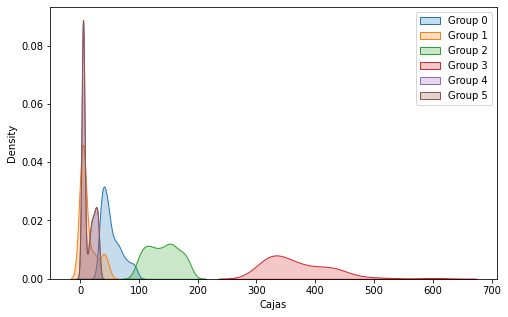

In [64]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

sns.kdeplot(data=group_0, x='Cajas', ax=ax, label="Group 0", shade=True)
sns.kdeplot(data=group_1, x='Cajas', ax=ax, label="Group 1", shade=True)
sns.kdeplot(data=group_2, x='Cajas', ax=ax, label="Group 2", shade=True)
sns.kdeplot(data=group_3, x='Cajas', ax=ax, label="Group 3", shade=True)
sns.kdeplot(data=group_4, x='Cajas', ax=ax, label="Group 4", shade=True)
sns.kdeplot(data=group_4, x='Cajas', ax=ax, label="Group 5", shade=True)
ax.legend();

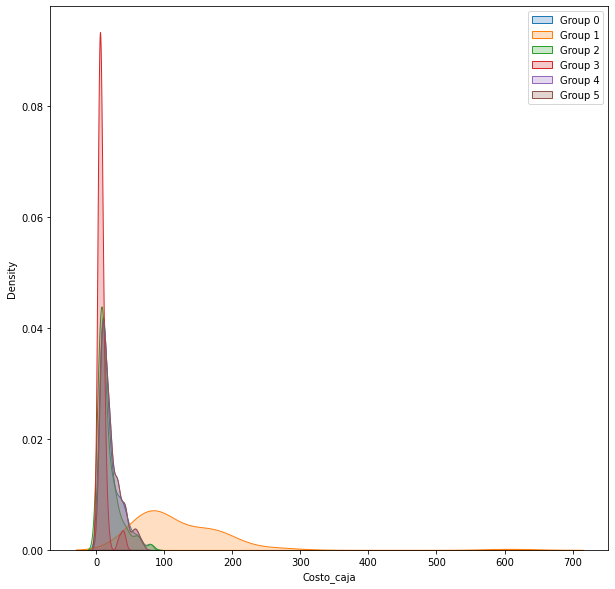

In [65]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

sns.kdeplot(data=group_0, x='Costo_caja', ax=ax, label="Group 0", shade=True)
sns.kdeplot(data=group_1, x='Costo_caja', ax=ax, label="Group 1", shade=True)
sns.kdeplot(data=group_2, x='Costo_caja', ax=ax, label="Group 2", shade=True)
sns.kdeplot(data=group_3, x='Costo_caja', ax=ax, label="Group 3", shade=True)
sns.kdeplot(data=group_4, x='Costo_caja', ax=ax, label="Group 4", shade=True)
sns.kdeplot(data=group_4, x='Costo_caja', ax=ax, label="Group 5", shade=True)
ax.legend();

In [66]:
import plotly.express as px

fig = px.scatter_3d(X, x='Cajas', y='Costo_caja', z='Group',
              color='Group')
fig.show()

# Método de CODO

In [67]:
inertia = []
for n in range(1, 11):
  model = KMeans(n_clusters=n, init="random", n_init=10, max_iter=300, algorithm="elkan")
  model.fit(X)
  inertia.append(model.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.



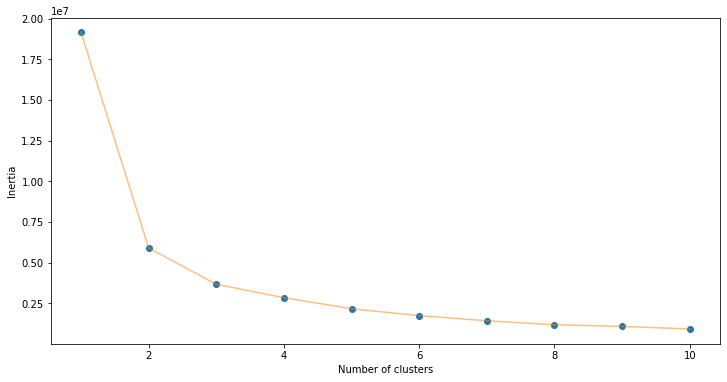

In [68]:
plt.figure(1, figsize=(12, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia");